In [1]:
from lm_results import *
import pickle as p
import matplotlib.pyplot as plt

Done loading English Gutenberg corpus!


In [352]:
train = ModulateText(english_gutenberg_10m, language="english")
model = NgramModel(train.tokens, alpha=0.01, n=3)
test = ModulateText(english_gutenberg_1m, language="english")
t = LMResults(model, test)

In [353]:
window_size = 5
windows = t.get_windows(test, window_size)

INBOUND
filtered!


In [354]:
fd = {}
files = ['words_most_likely_final.txt', 'words_mid_likely_final.txt', 'words_least_likely_final.txt']
ndf = pd.DataFrame(columns = ['window','entropy'])
for file in files:
    d = {}
    i = 0
    with open(file, "r") as nt:
        text = nt.readlines()
        for line in text:
            line = line.replace('\n','')
            line = line.replace('[','')
            line = line.replace(']','')
            line = line.split(',')
            ndf.loc[i] = [line, t.logp_words(line)]
            i+=1
f = open("windows_and_entropies", 'wb')
p.dump(ndf,f)
# ndf

In [355]:
file = open('../2_jspsych/wordinfo_experiment/solutions', 'rb')
s = p.load(file)


In [394]:
df = pd.read_csv("../2_jspsych/wordinfo_experiment/woe_final-merged.csv")
for i,v in enumerate(df.iterrows()):
#     n = v[4]
    if len(n) > 0:
        print(v)

IndexError: tuple index out of range

In [356]:
def get_wo(w0):
    w0 = w0.replace('[','')
    w0 = w0.replace(']','')
    w0 = w0.replace("'", '')
    w0 = w0.replace(' ','')
    w0 = w0.split(',')
    wordorder = t.logp_words(w0) - t.logp_word_set(w0)
    return -wordorder

In [367]:
def get_wo__(w0):
    w0 = w0.replace('[','')
    w0 = w0.replace(']','')
    w0 = w0.replace("'", '')
    w0 = w0.replace(' ','')
    w0 = w0.split(',')
    wordorder = t.logp_words(w0) - t.logp_word_set(w0)
    return -t.logp_words(w0), -t.logp_word_set(w0)
s['logp_words'] = [0.0]*30
s['logp_word_set'] = [0.0]*30

for i,v in enumerate(s.iterrows()):
    s['logp_words'][i], s['logp_word_set'][i] = get_wo__(s.loc[i]['solution'])
s

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,solution,correct,wordorder entropy,logp_words,logp_word_set
26,"['there', 'was', 'no', 'time', 'to']",0.9,0.002766,15.844429,15.841663
24,"['that', 'in', 'spite', 'of', 'his']",0.7,0.050154,15.635234,15.585080
10,"['he', 'went', 'back', 'to', 'his']",0.8,0.064541,17.960467,17.895926
1,"['and', 'you', 'will', 'not', 'be']",0.9,0.147063,15.863508,15.716444
12,"['it', 'was', 'not', 'so', 'with']",0.3,0.275834,17.960473,17.684639
25,"['the', 'rest', 'of', 'the', 'world']",1.0,0.715999,15.903810,15.187811
2,"['as', 'well', 'as', 'in', 'the']",0.8,0.740147,15.618262,14.878115
9,"['he', 'felt', 'that', 'he', 'was']",0.7,0.748276,15.630115,14.881839
27,"['to', 'know', 'what', 'to', 'do']",0.8,0.854988,15.621179,14.766191
0,"['and', 'it', 'was', 'just', 'as']",0.1,0.932533,17.957127,17.024594


In [362]:
t.logp_words(['<<<!!!UNK>>']*5)
t.logp_words(['there', 'was', 'no', 'time', 'to'])

-15.844428836994542

In [357]:
swo = pd.DataFrame(columns=['wordorder entropy'])
for e,i in enumerate(s.iterrows()):
    window = i[1]['solution']
    wo = get_wo(str(window))
    swo.loc[e] = wo
    
s['wordorder entropy'] = swo
s = s.sort_values('wordorder entropy')
s2 = s.sort_values('correct', ascending=False)


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

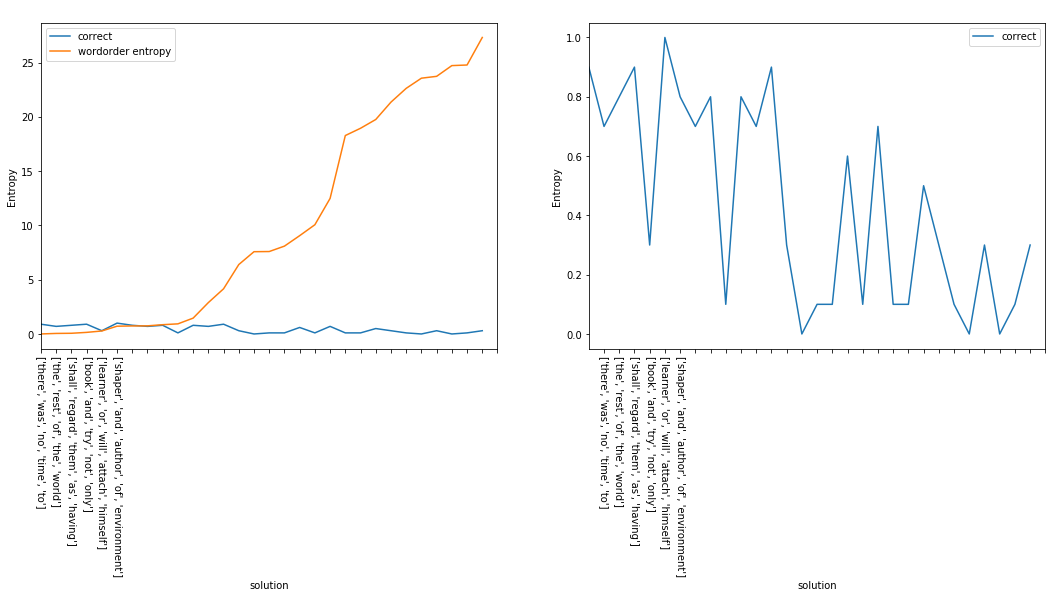

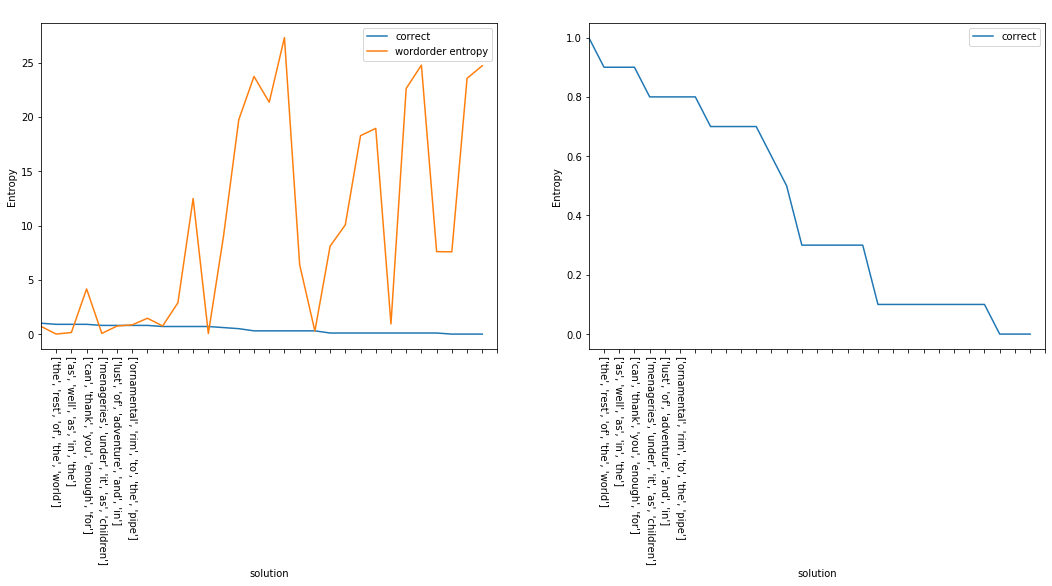

In [395]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
axis = s.plot(x="solution", y=["correct", "wordorder entropy"], title=' ', ax=ax[0])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(0,31,1))
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)

axis = s.plot(x="solution", y=["correct"], title=name, ax=ax[1])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(1,31,1))
plt.xticks(rotation='vertical')
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)

fig, ax = plt.subplots(ncols=2, figsize=(18,6))
axis = s2.plot(x="solution", y=["correct", "wordorder entropy"], title=name, ax=ax[0])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(1,31,1))
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)

axis = s2.plot(x="solution", y=["correct"], title=name, ax=ax[1])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(1,31,1))
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)


fig, ax = plt.subplots(ncols=2, figsize=(18,6))
axis = s.plot(x="solution", y=["correct", "wordorder entropy"], title=' ', ax=ax[0])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(0,31,1))
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)

axis = s.plot(x="solution", y=["correct"], title=name, ax=ax[1])
axis.set(xlabel="solution", ylabel="Entropy")
axis.set_xticks(range(1,31,1))
plt.xticks(rotation='vertical')
axis.set_xticklabels(axis.get_xticklabels(), rotation=270)


plt.scatter()

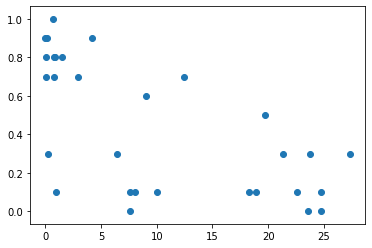

In [396]:
plt.scatter(s['wordorder entropy'], s['correct'])

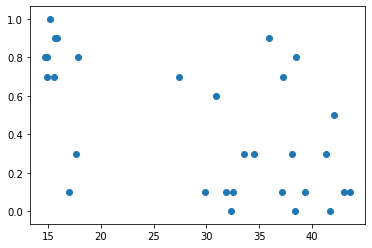

In [397]:
plt.scatter(s['logp_word_set'], s['correct'])

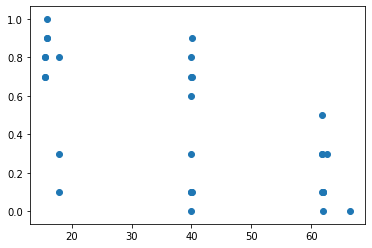

In [398]:
plt.scatter(s['logp_words'], s['correct'])

In [373]:
file = open('full_solutions', 'rb')
full = p.load(file)
full

,solution,correct,wordorder entropy,sentence
26,"['there', 'was', 'no', 'time', 'to']",0.9,0.002766,
24,"['that', 'in', 'spite', 'of', 'his']",0.7,0.050154,
10,"['he', 'went', 'back', 'to', 'his']",0.8,0.064541,
1,"['and', 'you', 'will', 'not', 'be']",0.9,0.147063,
12,"['it', 'was', 'not', 'so', 'with']",0.3,0.275834,
25,"['the', 'rest', 'of', 'the', 'world']",1.0,0.715999,
2,"['as', 'well', 'as', 'in', 'the']",0.8,0.740147,
9,"['he', 'felt', 'that', 'he', 'was']",0.7,0.748276,
27,"['to', 'know', 'what', 'to', 'do']",0.8,0.854988,
0,"['and', 'it', 'was', 'just', 'as']",0.1,0.932533,


In [369]:
# # if 'ornamental rim to the pipe' in test.text:
# print(test.text.find('ornamental rim to the pipe'))
# test.text[3306500:3308115]

In [370]:
# a = [1,2,3]  
# b = [0,1,2,3,4,5]

# def a_in_b(a,b):
#     for i,v in enumerate(b[:len(b)-len(a)]):
#         if b[i:i+len(a)] == a:
#             print(i)

In [371]:
# a_in_b(['shaper', 'and', 'author', 'of', 'environment'], test.tokens)

In [372]:
# test.text

In [336]:
# t19 = "No such conditions can exist as descending into vice and its attendant sufferings apart from vicious inclinations, or ascending into virtue and its pure happiness\nwithout the continued cultivation of virtuous aspirations; and man,\ntherefore, as the lord and master of thought, is the maker of\nhimself the shaper and author of environment."
# t = "The veteran, Mr.\nGrenfell, gave evidence at this sitting, and it is useful to summarize his\nviews as he was one of the men who held out longest against the\ncondemnation of King Leopold, and because his early utterances have been\nquoted as if he were a supporter of the system."
# t = "There is an ornamental rim to the pipe\nof the elves which shows that the graces of art are not unknown among\nthem."
# t = "I could not picture a father treating a dying child\nas tyrannically and wickedly as I afterwards learned Heathcliff had\ntreated him, to compel this apparent eagerness: his efforts redoubling\nthe more imminently his avaricious and unfeeling plans were threatened\nwith defeat by death."
# t = 'After showing that the Kasai Company, in their haste for wealth (and,\nperhaps, in their foresight, as knowing that their occupancy may be\nbrought to an end), are cutting down the rubber vines instead of tapping\nthem (illegal, of course, but what does that matter where Belgian\nConcessionnaires are in question), goes on to show the pressure on the\npeople:\n\n    "The work is compulsory; it is also incessant.'
# t = "Mind is the Master power that moulds and makes,\n  And Man is Mind, and evermore he takes\n  The tool of Thought, and, shaping what he wills,\n  Brings forth a thousand joys, a thousand ills:--\n  He thinks in secret, and it comes to pass:\n  Environment is but his looking-glass._\n\n\n\nAuthorized Edition\n\nNew York\n\n\n\n\n\nCONTENTS\n\n\nTHOUGHT AND CHARACTER\n\nEFFECT OF THOUGHT ON CIRCUMSTANCES\n\nEFFECT OF THOUGHT ON HEALTH AND THE BODY\n\nTHOUGHT AND PURPOSE\n\nTHE THOUGHT-FACTOR IN ACHIEVEMENT\n\nVISIONS AND IDEALS\n\nSERENITY\n\n\n\n\n\n\nFOREWORD\n\n\nTHIS little volume (the result of meditation and experience) is not\nintended as an exhaustive treatise on the much-written-upon subject\nof the power of thought."
# t = 'Now, the old sofa was a regular patriarch of a sofa--long, broad,\nwell-cushioned, and low, a trifle shabby, as well it might be, for the\ngirls had slept and sprawled on it as babies, fished over the back,\nrode on the arms, and had menageries under it as children, and rested\ntired heads, dreamed dreams, and listened to tender talk on it as young\nwomen.'
# t = "And Laurie put his arm about her with a brotherly gesture which\nwas very comforting.\n\nWhen he had gone, she went to her little chapel, and sitting in the\ntwilight, prayed for Beth, with streaming tears and an aching heart,\nfeeling that a million turquoise rings would not console her for the\nloss of her gentle little sister."
# t = "Yet, sitting in\nthe shadow of death, Fielding displayed a quiet, gentle courage and\nconstancy of mind, which show how splendid a nature had been\nshrouded by his earlier frailties."
# t = 'The extent and towering structure of the\nsciences have increased enormously, and therewith also the probability\nthat the philosopher will grow tired even as a learner, or will attach\nhimself somewhere and "specialize" so that he will no longer attain to\nhis elevation, that is to say, to his superspection, his circumspection,\nand his DESPECTION.'
# t = 'Here it is, and we never can thank\nyou enough for the patient sowing and reaping you have done," cried Jo,\nwith the loving impetuosity which she never would outgrow.'
# t = 'But surely it was the\nnobler when done out of the pure lust of adventure and in answer to\nthe call of the sea, with no golden bait to draw them on.'
# t = '\nI perhaps risk something when I allow such a truth to escape; let\nothers capture it again and give it so much "milk of pious sentiment"\n[FOOTNOTE: An expression from Schiller\'s William Tell, Act IV, Scene\n3.] to drink, that it will lie down quiet and forgotten, in its old\ncorner.'
# t = 'It was on the 21st that Lee seemed to have given up the Weldon\nRailroad as having been lost to him; but along about the 24th or 25th he\nmade renewed attempts to recapture it; again he failed and with very\nheavy losses to him as compared with ours.'
# t = 'Laurie never forgets that," she said,\nputting the fresh nosegay in the vase that stood in \'Marmee\'s corner\',\nand was kept supplied by the affectionate boy.'
# t = "I\'ll take a leaf out of her book, and\ntry not only to seem glad, but to be so, and not grudge her one minute\nof happiness."
# t = "And it is notable that though she\nnever nags her husband, and frankly loves the Colonel as if she were\nhis favorite daughter, she has never got out of the habit of nagging\nHiggins that was established on the fatal night when she won his bet\nfor him."
# t = "Her mother has insinuated that her temper is intractable, but I never\nsaw a face less indicative of any evil disposition than hers; and from\nwhat I can see of the behaviour of each to the other, the invariable\nseverity of Lady Susan and the silent dejection of Frederica, I am\nled to believe as heretofore that the former has no real love for her\ndaughter, and has never done her justice or treated her affectionately."
# t = "When we reached a safe position I instructed my little command again to\ncarry their arms at a trail, not to fire at the enemy until they were\nordered, and to move very cautiously following me until the San Cosme\nroad was reached; we would then be on the flank of the men serving the\ngun on the road, and with no obstruction between us and them."
# t = "If Germany were\nan island, like ourselves, she might risk such a venture."
t = "I shall regard them as having been rejected, and shall\nact accordingly."


t = t.replace('\n',' ')
t

'I shall regard them as having been rejected, and shall act accordingly.'

In [337]:
# s['sentence'] = ['']*30
# for i,v in enumerate(s.iterrows()):
#     s['sentence'][i] = 'eeeee'
# s['sentence'][19] = t19
# s['sentence'][22] = t
# s['sentence'][17] = t
# s['sentence'][11] = t
# s['sentence'][6] = t
# s['sentence'][8] = t
# s['sentence'][15] = t
# s['sentence'][28] = t
# s['sentence'][7] = t
# s['sentence'][13] = t
# s['sentence'][4] = t
# s['sentence'][21] = t
# s['sentence'][3] = t
# s['sentence'][16] = t
# s['sentence'][23] = t
# s['sentence'][29] = t
# s['sentence'][20] = t
s['sentence'][18] = t


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [341]:
file = open('full_solutions', 'wb')
p.dump(s,file)

,solution,correct,wordorder entropy,sentence
26,"['there', 'was', 'no', 'time', 'to']",0.9,0.002766,
24,"['that', 'in', 'spite', 'of', 'his']",0.7,0.050154,
10,"['he', 'went', 'back', 'to', 'his']",0.8,0.064541,
1,"['and', 'you', 'will', 'not', 'be']",0.9,0.147063,
12,"['it', 'was', 'not', 'so', 'with']",0.3,0.275834,
25,"['the', 'rest', 'of', 'the', 'world']",1.0,0.715999,
2,"['as', 'well', 'as', 'in', 'the']",0.8,0.740147,
9,"['he', 'felt', 'that', 'he', 'was']",0.7,0.748276,
27,"['to', 'know', 'what', 'to', 'do']",0.8,0.854988,
0,"['and', 'it', 'was', 'just', 'as']",0.1,0.932533,
